# This program optimizes a stock portfolio automatically

In [1]:
# Import the python libraries 
import pandas as pd
import numpy as np
import requests
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split

## Real State

In [2]:
# Get the Real State Stock data using yahoo source
#df = web.DataReader(['ARE', 'AMT', 'AIV', 'AVB', 'BXP', 'CBRE', 'CCI', 'DLR', 'DRE', 'EQIX', 'EQR', 'ESS', 'EXR', 'FRT', 'PEAK', 'HST', 'IRM', 'KIM', 'MAA', 'PLD', 'PSA', 'O', 'REG', 'SBAC', 'SPG' 'SLG', 'UDR', 'VTR', 'VNO', 'WELL', 'WY'], data_source='yahoo', start='2016-01-01', end='2021-02-11')
#df
# Rename Adj Close to Adj_Close
#df = df.rename(columns={
#    "Adj Close": "NYSE_Adj_Close"
#})
#df

In [3]:
#df = df.copy()

In [4]:
# Pick all Stocks NYSE_Adj_Close
#NYSE_Close_df = df["NYSE_Adj_Close"]
#NYSE_Close_df.tail(10)

In [5]:
#NYSE_Close_df.to_csv(index=True)

In [6]:
#compression_opts = dict(method='zip',
#                        archive_name='out2.csv')  
#NYSE_Close_df.to_csv('out.zip', index=True,
#          compression=compression_opts)

In [7]:
real_state_stocks = pd.read_csv('..//Resources/Real_State_Stocks_Update.csv')
# Reset the date as the index
real_state_stocks = real_state_stocks.set_index(pd.DatetimeIndex(real_state_stocks['Date'].values))
#Remove the Date column
real_state_stocks.drop(columns=['Date'], axis=1, inplace=True)
real_state_stocks.drop(columns=['SPGSLG'], axis=1, inplace=True)

real_state_stocks

,ARE,AMT,AIV,AVB,BXP,CBRE,CCI,DLR,DRE,EQIX,...,PLD,PSA,O,REG,SBAC,UDR,VTR,VNO,WELL,WY
2016-01-04,77.068512,87.649292,3.343637,152.965378,107.119522,34.090000,71.082344,63.949455,17.590481,268.626739,...,36.177544,203.908585,41.138844,56.187164,104.787628,30.995798,43.688343,62.928524,53.365490,24.703295
2016-01-05,78.132286,89.380524,3.428810,156.486481,109.758713,34.389999,72.539116,64.024963,17.826033,275.277191,...,36.937355,209.666153,42.031063,57.285286,106.164856,31.389849,44.458313,63.759697,54.692017,24.761265
2016-01-06,77.604713,89.063278,3.390018,155.318420,109.741447,32.910000,71.931442,64.620842,17.573656,280.466766,...,36.738770,209.999908,42.280251,57.618053,105.193855,31.163475,44.050220,63.459209,54.574982,24.214693
2016-01-07,75.036072,86.842606,3.370622,154.607468,107.792252,31.070000,70.141708,64.436203,17.077320,275.168304,...,35.780361,207.813721,41.548790,57.085629,101.646767,30.807007,43.280251,62.832607,53.014355,23.320307
2016-01-08,74.006874,85.410469,3.306533,151.865036,104.773590,30.719999,69.159416,64.654419,16.715590,281.065674,...,35.460896,206.295044,41.130798,56.594807,100.705498,30.401541,43.318752,61.477116,53.131386,23.104990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-05,171.699997,232.990006,4.830000,172.220001,92.120003,67.419998,162.259995,145.559998,41.380001,754.289978,...,106.699997,229.339996,61.180000,49.110001,273.859985,40.070000,48.470001,37.389999,64.019997,34.400002
2021-02-08,170.419998,232.789993,4.900000,173.330002,95.349998,67.930000,160.899994,146.369995,41.610001,747.409973,...,107.080002,232.509994,60.900002,48.959999,267.010010,40.959999,48.150002,38.040001,63.209999,35.160000
2021-02-09,171.339996,231.660004,4.950000,173.830002,95.980003,67.440002,163.990005,148.240005,41.779999,750.469971,...,107.419998,236.369995,61.740002,49.540001,266.660004,41.169998,48.240002,37.689999,63.230000,34.570000
2021-02-10,172.910004,231.660004,4.920000,175.850006,94.669998,68.099998,163.080002,147.529999,42.070000,751.000000,...,107.519997,234.100006,62.500000,50.160000,266.019989,41.730000,49.639999,38.900002,64.930000,34.400002


In [8]:
# Get the assets /tickers
assets = real_state_stocks.columns

In [9]:
# Optimize the portfolio
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [10]:
# Calculate the expected annualized returns and the annualized sample covariance matrix of the daily asset returns
mu = expected_returns.mean_historical_return(real_state_stocks)
S = risk_models.sample_cov(real_state_stocks)

In [11]:
# Optimize for the maximal Sharpe ratio 
ef = EfficientFrontier(mu, S) # Creates the Efficient Frontier Object
weights = ef.max_sharpe()

cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('ARE', 0.0), ('AMT', 0.17144), ('AIV', 0.0), ('AVB', 0.0), ('BXP', 0.0), ('CBRE', 0.0), ('CCI', 0.0), ('DLR', 0.0), ('DRE', 0.0), ('EQIX', 0.26991), ('EQR', 0.0), ('ESS', 0.0), ('EXR', 0.0), ('FRT', 0.0), ('PEAK', 0.0), ('HST', 0.0), ('IRM', 0.0), ('KIM', 0.0), ('MAA', 0.0), ('PLD', 0.50556), ('PSA', 0.0), ('O', 0.0), ('REG', 0.0), ('SBAC', 0.05309), ('UDR', 0.0), ('VTR', 0.0), ('VNO', 0.0), ('WELL', 0.0), ('WY', 0.0)])
Expected annual return: 22.4%
Annual volatility: 23.7%
Sharpe Ratio: 0.86


(0.2237584682590914, 0.23728604647378732, 0.8587039621042376)

In [12]:
# Get the descret allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

portfolio_val = 100000
latest_prices = get_latest_prices(real_state_stocks)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=portfolio_val)
allocation, leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds Remaining: $", leftover)

Discrete allocation: {'AMT': 75, 'AIV': 3, 'EQIX': 38, 'PLD': 467, 'SBAC': 20}
Funds Remaining: $ 1.878227914989111


## Communication Services

In [13]:
# Get the Communication Services Stock data using yahoo source
#df_2 = web.DataReader(['ATVI', 'GOOGL', 'GOOG', 'T', 'CTL', 'CHTR', 'CMCSA', 'DISCA', 'DISCK','DISH', 'EA', 'FB', 'FOXA', 'FOX', 'IPG', 'LYV', 'NFLX', 'NWSA', 'NWS' 'OMC', 'TMUS', 'TTWO', 'DIS', 'TWTR', 'VZ', 'VIAC'], data_source='yahoo', start='2016-01-01', end='2021-02-11')
# Rename Adj Close to Adj_Close
#df_2 = df_2.rename(columns={
 #   "Adj Close": "NYSE2_Adj_Close"
#})
#df_2

In [14]:
#df_2 = df_2.copy()

In [15]:
# Pick all Stocks NYSE2_Adj_Close
#NYSE2_Close_df = df_2["NYSE2_Adj_Close"]
#NYSE2_Close_df

In [16]:
#NYSE2_Close_df.to_csv(index=True)

In [17]:
#compression_opts = dict(method='zip',
#                        archive_name='out2.csv')  
#NYSE2_Close_df.to_csv('out.zip', index=True,
#          compression=compression_opts)

In [18]:
comm_srvc_stocks = pd.read_csv('..//Resources/Communication_Services.csv')
# Reset the date as the index
comm_srvc_stocks = comm_srvc_stocks.set_index(pd.DatetimeIndex(comm_srvc_stocks['Date'].values))
#Remove the Date column
comm_srvc_stocks.drop(columns=['Date'], axis=1, inplace=True)
comm_srvc_stocks

,ATVI,GOOGL,GOOG,T,CHTR,CMCSA,DISCA,DISCK,DISH,EA,FB,IPG,LYV,NFLX,NWSA,TMUS,TTWO,DIS,TWTR,VZ
2016-01-04,36.365803,759.440002,741.840027,25.432276,177.529999,25.244812,26.410000,25.160000,57.290001,66.012039,102.220001,18.875580,23.969999,109.959999,12.225597,38.950001,34.169998,97.155785,22.559999,36.341522
2016-01-05,35.901806,761.530029,742.580017,25.609972,175.169998,25.249348,26.469999,25.270000,57.349998,64.853584,102.730003,19.239521,23.910000,107.660004,11.818386,40.220001,34.750000,95.193428,21.920000,36.840652
2016-01-06,35.563477,759.330017,743.619995,25.572432,174.309998,25.054256,26.280001,25.100000,56.060001,63.595261,102.970001,18.916929,23.770000,117.680000,11.762856,40.049999,34.009998,94.683952,21.389999,36.507820
2016-01-07,35.060810,741.000000,726.390015,25.159489,173.630005,24.777483,25.480000,24.320000,54.860001,62.376881,97.919998,18.329655,23.110001,114.559998,11.494468,40.509998,32.419998,93.872604,20.260000,36.307316
2016-01-08,34.519478,730.909973,714.469971,25.182014,174.889999,24.804712,26.010000,25.000000,53.810001,63.045990,97.330002,18.238667,22.809999,111.389999,11.642544,39.880001,32.340000,93.636742,19.980000,35.954430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-05,101.610001,2088.830078,2098.000000,28.930000,617.650024,51.110001,42.669998,36.419998,31.209999,141.220001,268.100006,25.980000,74.339996,550.789978,21.219999,125.279999,207.490005,181.160004,56.779999,55.320000
2021-02-08,101.190002,2084.520020,2092.909912,28.770000,615.530029,51.849998,43.250000,37.000000,31.520000,142.460007,266.579987,26.610001,76.389999,547.919983,21.700001,126.099999,213.339996,190.000000,58.200001,55.049999
2021-02-09,102.730003,2075.389893,2083.510010,28.620001,619.510010,52.720001,43.500000,37.200001,32.279999,146.110001,269.450012,26.290001,77.519997,559.070007,22.180000,124.449997,200.309998,188.210007,59.869999,55.000000
2021-02-10,102.760002,2086.479980,2095.379883,28.549999,611.630005,52.750000,45.070000,38.430000,32.290001,144.610001,271.869995,24.549999,79.629997,563.590027,22.620001,124.489998,199.820007,189.630005,67.769997,54.959999


In [19]:
# Get the assets /tickers
assets_1 = comm_srvc_stocks.columns

In [20]:
# Calculate the expected annualized returns and the annualized sample covariance matrix of the daily asset returns
mu_1 = expected_returns.mean_historical_return(comm_srvc_stocks)
S_1 = risk_models.sample_cov(comm_srvc_stocks)

In [21]:
# Optimize for the miximal Shrpe ratio 
ef_1 = EfficientFrontier(mu_1, S_1) # Creates the Efficient Frontier Object
weights_1 = ef_1.max_sharpe()

cleaned_weights_1 = ef_1.clean_weights()
print(cleaned_weights_1)
ef_1.portfolio_performance(verbose=True)

OrderedDict([('ATVI', 0.0), ('GOOGL', 0.0), ('GOOG', 0.0), ('T', 0.0), ('CHTR', 0.27154), ('CMCSA', 0.0), ('DISCA', 0.0), ('DISCK', 0.0), ('DISH', 0.0), ('EA', 0.0), ('FB', 0.0), ('IPG', 0.0), ('LYV', 0.06994), ('NFLX', 0.14276), ('NWSA', 0.0), ('TMUS', 0.14056), ('TTWO', 0.37519), ('DIS', 0.0), ('TWTR', 0.0), ('VZ', 0.0)])
Expected annual return: 33.7%
Annual volatility: 24.3%
Sharpe Ratio: 1.30


(0.3372399839124614, 0.24316352441965186, 1.3046363950744861)

In [22]:
# Get the descret allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

portfolio_val_1 = 5000
latest_prices_1 = get_latest_prices(comm_srvc_stocks)
weights_1 = cleaned_weights_1
da_1 = DiscreteAllocation(weights_1, latest_prices_1, total_portfolio_value=portfolio_val_1)
allocation, leftover = da_1.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds Remaining: $", leftover)

Discrete allocation: {'CHTR': 2, 'LYV': 5, 'NFLX': 1, 'TMUS': 6, 'TTWO': 10}
Funds Remaining: $ 82.25002310000036


# Energy Industry

In [23]:
# Get the Energy Industry Stock data using yahoo source
#df_3 = web.DataReader(['APA', 'BKR', 'COG', 'CVX', 'CXO', 'COP', 'DVN', 'FANG', 'EOG', 'XOM', 'HAL', 'HES', 'HFC', 'KMI', 'MRO', 'MPC', 'NOV', 'NBL', 'OXY', 'OKE', 'PSX', 'PXD', 'SLB', 'FTI', 'VLO', 'WMB'], data_source='yahoo', start='2016-01-01', end='2021-02-11')
# Rename Adj Close to Adj_Close
#df_3 = df_3.rename(columns={
#    "Adj Close": "NYSE2_Adj_Close"
#})
#df_3

In [24]:
#df_3 = df_3.copy()
# Pick all Stocks NYSE2_Adj_Close
#NYSE3_Close_df = df_3["NYSE2_Adj_Close"]
#NYSE3_Close_df

In [25]:
# Save data in CSV
#NYSE3_Close_df.to_csv(index=True)
#compression_opts = dict(method='zip',
#                        archive_name='Energy.csv')  
#NYSE3_Close_df.to_csv('out.zip', index=True,
#          compression=compression_opts)

In [26]:
energy_stocks = pd.read_csv('..//Resources/Energy.csv')
# Reset the date as the index
energy_stocks = energy_stocks.set_index(pd.DatetimeIndex(energy_stocks['Date'].values))
#Remove the Date column
energy_stocks.drop(columns=['Date'], axis=1, inplace=True)
energy_stocks

,APA,BKR,COG,CVX,COP,DVN,FANG,EOG,XOM,HAL,...,MPC,NOV,OXY,OKE,PSX,PXD,SLB,FTI,VLO,WMB
2016-01-04,39.543907,28.731899,16.475842,71.638252,40.920422,29.116301,63.146084,64.967064,60.137077,31.090391,...,42.612789,33.140072,53.494770,17.779253,66.823830,119.891457,57.945786,27.316675,55.394550,19.169983
2016-01-05,38.742870,27.923147,16.457108,72.251015,41.374325,29.575748,62.267342,65.386627,60.649494,31.018261,...,42.080540,32.192108,54.383587,17.793283,67.591522,120.682060,58.213818,26.933384,56.360832,19.235733
2016-01-06,34.292744,26.542803,15.005284,69.396790,39.584930,27.215450,59.411373,62.766670,60.144859,30.134590,...,40.517078,30.008947,51.931446,16.986725,65.113182,111.985474,56.706112,25.344112,55.964798,16.729898
2016-01-07,32.530476,25.855671,15.529811,66.937637,38.458923,25.278568,57.692089,61.032486,59.182156,29.674734,...,39.909992,29.434431,50.995026,15.976785,63.794724,112.245789,55.441330,25.082355,57.097397,15.056913
2016-01-08,32.619495,25.284071,16.110540,66.220039,37.786808,25.674955,58.035938,61.088421,57.986561,29.268967,...,38.413048,28.668409,50.130035,16.166143,62.759995,111.686584,54.511578,24.306417,54.063923,14.837744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-05,16.219999,21.900000,17.559999,89.260002,44.015751,17.900000,64.449997,56.610001,49.115902,18.980000,...,47.650002,13.370000,22.559999,42.840000,72.040001,128.240005,25.010000,10.760000,60.783546,22.090000
2021-02-08,17.840000,22.549999,17.809999,91.480003,46.354275,18.750000,68.930000,59.410000,51.230000,20.040001,...,49.480000,13.650000,25.450001,43.430000,75.790001,133.050003,25.990000,10.620000,63.806969,22.500000
2021-02-09,17.230000,22.270000,17.490000,90.959999,46.453365,18.870001,66.970001,58.220001,50.630001,19.790001,...,48.869999,13.470000,24.650000,43.360001,74.529999,129.039993,26.000000,9.910000,63.609997,22.260000
2021-02-10,17.610001,23.010000,17.809999,92.519997,46.820000,19.730000,68.879997,60.209999,51.119999,20.260000,...,49.810001,13.850000,25.600000,44.750000,76.720001,132.350006,26.620001,10.360000,65.110001,22.809999


In [27]:
# Get the assets /tickers
assets_2 = energy_stocks.columns
# Calculate the expected annualized returns and the annualized sample covariance matrix of the daily asset returns
mu_2 = expected_returns.mean_historical_return(energy_stocks)
S_2 = risk_models.sample_cov(energy_stocks)

In [28]:
# Optimize for the miximal Shrpe ratio 
ef_2 = EfficientFrontier(mu_2, S_2) # Creates the Efficient Frontier Object
weights_2 = ef_2.max_sharpe()

cleaned_weights_2 = ef_2.clean_weights()
print(cleaned_weights_2)
ef_2.portfolio_performance(verbose=True)

OrderedDict([('APA', 0.0), ('BKR', 0.0), ('COG', 0.0), ('CVX', 0.0), ('COP', 0.0), ('DVN', 0.0), ('FANG', 0.0), ('EOG', 0.0), ('XOM', 0.0), ('HAL', 0.0), ('HES', 0.0), ('HFC', 0.0), ('KMI', 0.0), ('MRO', 0.0), ('MPC', 0.0), ('NOV', 0.0), ('OXY', 0.0), ('OKE', 1.0), ('PSX', 0.0), ('PXD', 0.0), ('SLB', 0.0), ('FTI', 0.0), ('VLO', 0.0), ('WMB', 0.0)])
Expected annual return: 19.6%
Annual volatility: 49.4%
Sharpe Ratio: 0.36


(0.19579404042454152, 0.4939949196931144, 0.35586204111926995)

In [29]:
# Get the descret allocation of each share per stock
portfolio_val_2 = 5000
latest_prices_2 = get_latest_prices(energy_stocks)
weights_2 = cleaned_weights_2
da_2 = DiscreteAllocation(weights_2, latest_prices_2, total_portfolio_value=portfolio_val_2)
allocation, leftover = da_2.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds Remaining: $", leftover)

Discrete allocation: {'OKE': 112}
Funds Remaining: $ 40.64013664000049


# Health Care

In [30]:
# Get the Health Care Industry Stock data using yahoo source
#df_4 = web.DataReader(['ABT', 'ABBV', 'ABMD', 'A', 'ALXN', 'ALGN', 'ABC', 'AMGN', 'ANTM', 'BAX', 'BDX', 'BIO', 'BIIB', 'BSX', 'BMY', 'CAH', 'CNC', 'CERN', 'CI', 'CVS', 'DHR', 'DVA', 'XRAY', 'DXCM', 'EW', 'GILD', 'HCA', 'HSIC', 'HOLX', 'HUM', 'IDXX', 'ILMN', 'INCY', 'ISRG', 'IQV', 'JNJ', 'LH', 'LLY', 'MCK', 'MDT', 'MRK', 'MTD', 'MYL', 'PKI', 'PRGO', 'PFE', 'DGX', 'REGN', 'RMD', 'STE', 'SYK', 'TFX', 'COO', 'TMO', 'UNH', 'UHS', 'VAR', 'VRTX', 'WAT', 'WST', 'ZBH', 'ZTS'], data_source='yahoo', start='2016-01-01', end='2021-02-18')
# Rename Adj Close to Adj_Close
#df_4 = df_4.rename(columns={
#    "Adj Close": "NYSE4_Adj_Close"
#})
#df_4

In [31]:
#df_4 = df_4.copy()
# Pick all Stocks NYSE4_Adj_Close
#NYSE4_Close_df = df_4["NYSE4_Adj_Close"]
#NYSE4_Close_df

In [32]:
# Save data in CSV
#NYSE4_Close_df.to_csv(index=True)
#compression_opts = dict(method='zip',
#                        archive_name='Health_Care.csv')  
#NYSE4_Close_df.to_csv('out.zip', index=True,
#          compression=compression_opts)

In [33]:
healthcare_stocks = pd.read_csv('..//Resources/Health_Care.csv')
# Reset the date as the index
healthcare_stocks = healthcare_stocks.set_index(pd.DatetimeIndex(healthcare_stocks['Date'].values))
#Remove the Date column
healthcare_stocks.drop(columns=['Date'], axis=1, inplace=True)
healthcare_stocks

,ABT,ABBV,ABMD,A,ALXN,ALGN,ABC,AMGN,ANTM,BAX,...,COO,TMO,UNH,UHS,VAR,VRTX,WAT,WST,ZBH,ZTS
2016-01-04,38.764435,45.658573,85.239998,38.873390,184.679993,64.269997,92.864838,136.663544,129.747482,35.209469,...,131.673859,136.612503,107.642540,116.051773,68.968185,122.889999,130.350006,56.028664,97.778976,45.639774
2016-01-05,38.755398,45.468349,85.000000,38.739635,184.899994,64.949997,94.223114,136.516800,131.639481,35.351543,...,131.394272,136.376175,107.845909,116.553696,69.134796,123.449997,129.809998,55.318573,99.815056,46.354256
2016-01-06,38.430336,45.476276,85.300003,38.911602,184.070007,64.870003,92.782799,135.265350,128.423966,35.436798,...,131.404251,135.332550,106.745987,113.866974,68.775269,122.230003,129.710007,55.688210,100.247200,46.363911
2016-01-07,37.509308,45.341534,81.919998,37.258835,174.369995,63.500000,89.820068,132.037277,126.224380,34.849506,...,127.779373,132.240906,103.603416,111.111336,67.345917,114.959999,128.820007,54.462589,97.942261,44.954262
2016-01-08,36.723721,44.105175,84.580002,36.867149,168.130005,64.529999,89.300491,130.078095,123.148712,34.290634,...,128.528336,132.093170,101.819542,110.599541,67.126694,110.709999,126.720001,53.927586,97.529274,44.297714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-11,126.839996,103.750000,322.929993,126.959999,154.589996,599.000000,104.529999,235.039993,292.839996,77.860001,...,385.000000,494.049988,333.070007,130.039993,176.089996,210.500000,282.829987,291.089996,162.210007,164.440002
2021-02-12,128.229996,104.440002,328.359985,127.980003,158.389999,609.580017,105.180000,237.210007,290.679993,78.730003,...,385.399994,507.829987,328.239990,129.279999,176.119995,213.979996,283.950012,294.010010,161.380005,166.710007
2021-02-16,128.020004,104.199997,322.779999,127.949997,156.690002,614.210022,103.370003,232.839996,289.619995,77.800003,...,386.459992,500.079987,324.619995,128.210007,176.149994,210.270004,282.510010,295.609985,160.369995,166.320007
2021-02-17,127.239998,106.290001,316.299988,130.119995,157.020004,599.530029,105.309998,235.610001,290.250000,77.680000,...,384.649994,498.459992,326.859985,129.020004,176.179993,214.850006,282.579987,293.989990,158.580002,168.899994


In [34]:
# Get the assets /tickers
assets_3 = healthcare_stocks.columns
# Calculate the expected annualized returns and the annualized sample covariance matrix of the daily asset returns
mu_3 = expected_returns.mean_historical_return(healthcare_stocks)
S_3 = risk_models.sample_cov(healthcare_stocks)

In [35]:
# Optimize for the miximal Shrpe ratio 
ef_3 = EfficientFrontier(mu_3, S_3) # Creates the Efficient Frontier Object
weights_3 = ef_3.max_sharpe()

cleaned_weights_3 = ef_3.clean_weights()
print(cleaned_weights_3)
ef_3.portfolio_performance(verbose=True)

OrderedDict([('ABT', 0.0), ('ABBV', 0.0), ('ABMD', 0.0), ('A', 0.0), ('ALXN', 0.0), ('ALGN', 0.08197), ('ABC', 0.0), ('AMGN', 0.0), ('ANTM', 0.0), ('BAX', 0.0), ('BDX', 0.0), ('BIO', 0.08634), ('BIIB', 0.0), ('BSX', 0.0), ('BMY', 0.0), ('CAH', 0.0), ('CNC', 0.0), ('CERN', 0.0), ('CI', 0.0), ('CVS', 0.0), ('DHR', 0.16247), ('DVA', 0.0), ('XRAY', 0.0), ('DXCM', 0.0), ('EW', 0.0), ('GILD', 0.0), ('HCA', 0.0), ('HSIC', 0.0), ('HOLX', 0.0), ('HUM', 0.0), ('IDXX', 0.38491), ('ILMN', 0.0), ('INCY', 0.0), ('ISRG', 0.0), ('IQV', 0.0), ('JNJ', 0.0), ('LH', 0.0), ('LLY', 0.0), ('MCK', 0.0), ('MDT', 0.0), ('MRK', 0.0), ('MTD', 0.0), ('PKI', 0.0), ('PRGO', 0.0), ('PFE', 0.0), ('DGX', 0.0), ('REGN', 0.0), ('RMD', 0.0), ('STE', 0.0), ('SYK', 0.0), ('TFX', 0.0), ('COO', 0.0), ('TMO', 0.0), ('UNH', 0.0), ('UHS', 0.0), ('VAR', 0.0), ('VRTX', 0.0), ('WAT', 0.0), ('WST', 0.2843), ('ZBH', 0.0), ('ZTS', 0.0)])
Expected annual return: 43.6%
Annual volatility: 23.3%
Sharpe Ratio: 1.78


(0.43563184484877193, 0.23286464243173174, 1.7848645483851053)

In [36]:
# Get the descret allocation of each share per stock
portfolio_val_3 = 5000
latest_prices_3 = get_latest_prices(healthcare_stocks)
weights_3 = cleaned_weights_3
da_3 = DiscreteAllocation(weights_3, latest_prices_3, total_portfolio_value=portfolio_val_3)
allocation, leftover = da_3.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds Remaining: $", leftover)

Discrete allocation: {'ALGN': 1, 'DHR': 3, 'IDXX': 4, 'WST': 5}
Funds Remaining: $ 1.9501651000000493


# Financials

In [37]:
# Get the Financial Industry Stock data using yahoo source
#df_5 = web.DataReader(['AFL', 'ALL', 'AXP', 'AIG', 'AMP', 'AON', 'AJG', 'AIZ', 'BAC', 'BRK.B', 'BLK', 'COF', 'CBOE', 'SCHW', 'CB', 'CINF', 'C', 'CFG', 'CME', 'CMA', 'DFS', 'ETFC', 'RE', 'FITB', 'FRC', 'BEN', 'GL', 'GS', 'HIG', 'HBAN', 'ICE', 'IVZ', 'JPM', 'KEY', 'LNC', 'L', 'MTB', 'MKTX', 'MMC', 'MET', 'MCO', 'MS', 'MSCI', 'NDAQ', 'NTRS', 'PBCT', 'PNC', 'PFG', 'PGR', 'PRU', 'RJF', 'RF', 'SPGI', 'STT', 'SIVB', 'SYF', 'TROW', 'BK', 'TRV', 'TFC', 'USB', 'UNM', 'WRB', 'WFC', 'WLTW', 'ZION'], data_source='yahoo', start='2016-01-01', end='2021-02-18')
# Rename Adj Close to Adj_Close
#df_5 = df_5.rename(columns={
#    "Adj Close": "NYSE5_Adj_Close"
#})
#df_5

In [38]:
#df_5 = df_5.copy()
# Pick all Stocks NYSE5_Adj_Close
#NYSE5_Close_df = df_5["NYSE5_Adj_Close"]
#NYSE5_Close_df

In [39]:
# Save data in CSV
#NYSE5_Close_df.to_csv(index=True)
#compression_opts = dict(method='zip',
#                        archive_name='Financials.csv')  
#NYSE5_Close_df.to_csv('out.zip', index=True,
#          compression=compression_opts)

In [40]:
financials_stocks = pd.read_csv('..//Resources/Financials.csv')
# Reset the date as the index
financials_stocks = financials_stocks.set_index(pd.DatetimeIndex(financials_stocks['Date'].values))
#Remove the Date column
financials_stocks.drop(columns=['Date'], axis=1, inplace=True)
financials_stocks

,AFL,ALL,AXP,AIG,AMP,AON,AJG,AIZ,BAC,BLK,...,TROW,BK,TRV,TFC,USB,UNM,WRB,WFC,WLTW,ZION
2016-01-04,26.098505,55.051224,62.056198,52.719463,90.581451,85.578888,35.706768,70.149368,14.890483,292.747284,...,60.950367,35.457455,97.662140,30.764809,35.783031,27.550598,32.091690,44.623524,115.985748,23.901657
2016-01-05,26.063225,54.924198,61.101345,52.902676,90.225212,86.097786,35.804474,71.319725,14.890483,293.503082,...,61.202187,35.324387,98.106171,30.773197,35.955559,27.407589,32.368645,44.606663,116.783737,23.642151
2016-01-06,25.666323,54.307175,59.404591,52.126232,87.158005,84.795845,35.111656,70.381660,14.573277,290.163483,...,59.830200,34.437279,96.836235,30.345093,35.412079,26.658886,31.959225,43.754837,111.345467,22.953108
2016-01-07,25.229729,53.027760,58.869747,50.878693,84.394966,83.559944,34.383305,68.800369,14.047625,277.481567,...,58.232403,33.567917,94.527206,29.480486,34.739208,25.918591,31.417341,42.506630,106.677445,22.264071
2016-01-08,25.009228,52.837204,58.676106,50.119698,82.492096,82.097641,34.019123,67.960564,13.775734,270.494568,...,56.756184,32.955826,94.127579,28.842527,34.247501,25.590513,31.314983,41.798183,108.227257,22.013508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-11,46.560211,104.480003,128.309998,41.599998,214.699997,229.309998,116.330002,130.479996,32.880001,721.429993,...,163.199997,42.130001,146.339996,52.779999,47.250000,24.280001,68.559998,32.720001,228.479996,48.585838
2021-02-12,46.590000,104.430000,129.619995,41.400002,218.080002,228.039993,116.680000,128.130005,33.369999,722.979981,...,163.190002,41.930000,145.960007,54.009998,47.639999,24.740000,67.879997,33.529999,227.419998,49.251400
2021-02-16,46.349998,103.209999,130.679993,42.150002,220.190002,227.100006,117.669998,125.949997,34.270000,730.309998,...,163.220001,42.750000,147.419998,55.650002,48.650002,25.559999,68.010002,34.790001,228.110001,50.959999
2021-02-17,47.040001,104.860001,128.559998,43.270000,218.389999,229.199997,117.660004,125.720001,34.410000,721.390015,...,163.240005,42.900002,148.449997,55.650002,49.299999,25.790001,67.879997,36.590000,229.889999,50.639999


In [41]:
# Get the assets /tickers
assets_4 = financials_stocks.columns
# Calculate the expected annualized returns and the annualized sample covariance matrix of the daily asset returns
mu_4 = expected_returns.mean_historical_return(financials_stocks)
S_4 = risk_models.sample_cov(financials_stocks)

In [42]:
# Optimize for the miximal Shrpe ratio 
ef_4 = EfficientFrontier(mu_4, S_4) # Creates the Efficient Frontier Object
weights_4 = ef_4.max_sharpe()

cleaned_weights_4 = ef_4.clean_weights()
print(cleaned_weights_4)
ef_4.portfolio_performance(verbose=True)

OrderedDict([('AFL', 0.0), ('ALL', 0.0), ('AXP', 0.0), ('AIG', 0.0), ('AMP', 0.0), ('AON', 0.0), ('AJG', 0.05405), ('AIZ', 0.0), ('BAC', 0.0), ('BLK', 0.0), ('COF', 0.0), ('CBOE', 0.0), ('SCHW', 0.0), ('CB', 0.0), ('CINF', 0.0), ('C', 0.0), ('CFG', 0.0), ('CME', 0.0), ('CMA', 0.0), ('DFS', 0.0), ('RE', 0.0), ('FITB', 0.0), ('FRC', 0.0), ('BEN', 0.0), ('GL', 0.0), ('GS', 0.0), ('HIG', 0.0), ('HBAN', 0.0), ('ICE', 0.0), ('IVZ', 0.0), ('JPM', 0.0), ('KEY', 0.0), ('LNC', 0.0), ('L', 0.0), ('MTB', 0.0), ('MKTX', 0.28181), ('MMC', 0.0), ('MET', 0.0), ('MCO', 0.0), ('MS', 0.0), ('MSCI', 0.39902), ('NDAQ', 0.0), ('NTRS', 0.0), ('PBCT', 0.0), ('PNC', 0.0), ('PFG', 0.0), ('PGR', 0.24753), ('PRU', 0.0), ('RJF', 0.0), ('RF', 0.0), ('SPGI', 0.0), ('STT', 0.0), ('SIVB', 0.01759), ('SYF', 0.0), ('TROW', 0.0), ('BK', 0.0), ('TRV', 0.0), ('TFC', 0.0), ('USB', 0.0), ('UNM', 0.0), ('WRB', 0.0), ('WFC', 0.0), ('WLTW', 0.0), ('ZION', 0.0)])
Expected annual return: 37.2%
Annual volatility: 23.2%
Sharpe Rati

(0.3716747322449576, 0.23156325859016083, 1.5186983219448456)

In [43]:
# Get the descret allocation of each share per stock
portfolio_val_4 = 5000
latest_prices_4 = get_latest_prices(financials_stocks)
weights_4 = cleaned_weights_4
da_4 = DiscreteAllocation(weights_4, latest_prices_4, total_portfolio_value=portfolio_val_4)
allocation, leftover = da_4.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds Remaining: $", leftover)

Discrete allocation: {'AJG': 3, 'KEY': 1, 'MKTX': 3, 'MSCI': 4, 'PGR': 14}
Funds Remaining: $ 9.99005537999983


# Information Technology

In [44]:
# Get the Information Technology Industry Stock data using yahoo source
#df_6 = web.DataReader(['ACN', 'ADBE', 'AMD', 'AKAM', 'APH', 'ADI', 'ANSS', 'AAPL', 'AMAT', 'ANET', 'ADSK', 'ADP', 'AVGO', 'BR', 'CDNS', 'CDW', 'CSCO', 'CTXS', 'CTSH', 'GLW', 'DXC', 'FFIV', 'FIS', 'FISV', 'FLT', 'FLIR', 'FTNT', 'IT', 'GPN', 'HPE', 'HPQ', 'INTC', 'IBM', 'INTU', 'IPGP', 'JKHY', 'JNPR', 'KEYS', 'KLAC', 'LRCX', 'LDOS', 'MA', 'MXIM', 'MCHP', 'MU', 'MSFT', 'MSI', 'NTAP', 'NLOK', 'NVDA', 'ORCL', 'PAYX', 'PAYC', 'PYPL', 'QRVO', 'QCOM', 'CRM', 'STX', 'NOW', 'SWKS', 'SNPS', 'TEL', 'TXN', 'TYL', 'VRSN', 'V', 'WDC', 'WU', 'XRX', 'XLNX', 'ZBRA'], data_source='yahoo', start='2016-01-01', end='2021-02-18')
# Rename Adj Close to Adj_Close
#df_6 = df_6.rename(columns={
#    "Adj Close": "NYSE6_Adj_Close"
#})
#df_6

In [45]:
#df_6 = df_6.copy()
# Pick all Stocks NYSE6_Adj_Close
#NYSE6_Close_df = df_6["NYSE6_Adj_Close"]
#NYSE6_Close_df

In [46]:
# Save data in CSV
#NYSE6_Close_df.to_csv(index=True)
#compression_opts = dict(method='zip',
#                        archive_name='Information_Technology.csv')  
#NYSE6_Close_df.to_csv('out.zip', index=True,
#          compression=compression_opts)

In [47]:
IT_stocks = pd.read_csv('..//Resources/Information_Technology.csv')
# Reset the date as the index
IT_stocks = IT_stocks.set_index(pd.DatetimeIndex(IT_stocks['Date'].values))
#Remove the Date column
IT_stocks.drop(columns=['Date'], axis=1, inplace=True)
IT_stocks

,ACN,ADBE,AMD,AKAM,APH,ADI,ANSS,AAPL,AMAT,ANET,...,TEL,TXN,TYL,VRSN,V,WDC,WU,XRX,XLNX,ZBRA
2016-01-04,93.090912,91.970001,2.770000,52.310001,48.479031,48.751160,90.099998,24.364536,17.168798,77.400002,...,56.773098,47.249733,167.029999,83.949997,72.920631,52.125351,14.665780,22.433086,41.560146,66.489998
2016-01-05,93.575417,92.339996,2.750000,52.020000,47.935814,48.392967,89.419998,23.753977,17.187387,78.279999,...,56.620960,46.754116,168.610001,81.410004,73.469719,51.900967,14.607517,22.389534,42.177193,64.820000
2016-01-06,93.392578,91.019997,2.510000,50.480000,46.801750,46.333305,88.290001,23.289116,16.480927,73.529999,...,55.556034,46.449772,166.410004,81.019997,72.506432,50.744541,14.274582,22.106394,41.405876,62.230000
2016-01-07,90.650055,89.110001,2.280000,48.189999,45.114948,45.151234,87.230003,22.306208,15.997561,68.750000,...,52.611771,44.954205,163.789993,80.550003,71.080765,49.907436,14.191350,21.496565,39.772518,59.410000
2016-01-08,89.772430,87.849998,2.140000,48.099998,44.438320,44.757225,85.400002,22.424154,15.607152,68.870003,...,52.039032,43.789036,160.630005,78.150002,70.204185,47.801708,14.074823,20.886730,38.955830,59.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-11,258.970001,496.619995,92.660004,101.459999,132.589996,158.800003,396.130005,135.130005,113.000000,318.049988,...,127.137772,179.220001,466.049988,204.550003,210.660004,63.959999,23.559999,23.580000,144.199997,470.079987
2021-02-12,257.470001,498.839996,93.769997,101.589996,135.899994,160.779999,403.600006,135.369995,116.699997,323.309998,...,129.289780,179.639999,474.790009,202.389999,209.960007,65.570000,23.990000,23.709999,145.750000,477.739990
2021-02-16,257.049988,501.640015,91.459999,98.879997,135.740005,160.490005,401.859985,133.190002,118.349998,318.660004,...,130.774261,180.759995,471.730011,198.149994,207.899994,66.660004,23.900000,23.950001,142.580002,486.010010
2021-02-17,258.779999,491.230011,89.940002,101.949997,133.970001,159.750000,393.899994,130.839996,115.709999,312.209991,...,129.230011,178.529999,469.040009,199.110001,207.509995,67.300003,23.870001,23.440001,139.320007,479.579987


In [48]:
# Get the assets /tickers
assets_5 = IT_stocks.columns
# Calculate the expected annualized returns and the annualized sample covariance matrix of the daily asset returns
mu_5 = expected_returns.mean_historical_return(IT_stocks)
S_5 = risk_models.sample_cov(IT_stocks)

In [49]:
# Optimize for the miximal Shrpe ratio 
ef_5 = EfficientFrontier(mu_5, S_5) # Creates the Efficient Frontier Object
weights_5 = ef_5.max_sharpe()

cleaned_weights_5 = ef_5.clean_weights()
print(cleaned_weights_5)
ef_5.portfolio_performance(verbose=True)

OrderedDict([('ACN', 0.0), ('ADBE', 0.0), ('AMD', 0.19823), ('AKAM', 0.0), ('APH', 0.0), ('ADI', 0.0), ('ANSS', 0.0), ('AAPL', 0.0), ('AMAT', 0.0), ('ANET', 0.0), ('ADSK', 0.0), ('ADP', 0.0), ('AVGO', 0.0), ('BR', 0.0), ('CDNS', 0.06396), ('CDW', 0.0), ('CSCO', 0.0), ('CTXS', 0.0), ('CTSH', 0.0), ('GLW', 0.0), ('DXC', 0.0), ('FFIV', 0.0), ('FIS', 0.0), ('FISV', 0.0), ('FLT', 0.0), ('FLIR', 0.0), ('FTNT', 0.0), ('IT', 0.0), ('GPN', 0.0), ('HPE', 0.0), ('HPQ', 0.0), ('INTC', 0.0), ('IBM', 0.0), ('INTU', 0.0), ('IPGP', 0.0), ('JKHY', 0.0), ('JNPR', 0.0), ('KEYS', 0.0), ('KLAC', 0.0), ('LRCX', 0.0), ('LDOS', 0.0), ('MA', 0.0), ('MXIM', 0.0), ('MCHP', 0.0), ('MU', 0.0), ('MSFT', 0.0), ('MSI', 0.0), ('NTAP', 0.0), ('NLOK', 0.0), ('NVDA', 0.22506), ('ORCL', 0.0), ('PAYX', 0.0), ('PAYC', 0.10573), ('PYPL', 0.24753), ('QRVO', 0.0), ('QCOM', 0.0), ('CRM', 0.0), ('STX', 0.0), ('NOW', 0.0), ('SWKS', 0.0), ('SNPS', 0.07798), ('TEL', 0.0), ('TXN', 0.0), ('TYL', 0.0), ('VRSN', 0.0), ('V', 0.0), ('WDC

(0.6568729768076231, 0.33505533376382113, 1.9007993982765599)

In [50]:
# Get the descret allocation of each share per stock
portfolio_val_5 = 5000
latest_prices_5 = get_latest_prices(IT_stocks)
weights_5 = cleaned_weights_5
da_5 = DiscreteAllocation(weights_5, latest_prices_5, total_portfolio_value=portfolio_val_5)
allocation, leftover = da_5.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds Remaining: $", leftover)

Discrete allocation: {'AMD': 12, 'CDNS': 3, 'NVDA': 2, 'PAYC': 1, 'PYPL': 4, 'SNPS': 1, 'ZBRA': 1}
Funds Remaining: $ 18.02008056640625


# Materials

In [51]:
# Get the Materials Industry Stock data using yahoo source
#df_7 = web.DataReader(['APD', 'ALB', 'AMCR', 'AVY', 'BLL', 'CE', 'CF', 'CTVA', 'DOW', 'DD', 'EMN', 'ECL', 'FMC', 'FCX', 'IFF', 'IP', 'LIN', 'LYB', 'MLM', 'NEM', 'NUE', 'PKG', 'PPG', 'SEE', 'SHW', 'MOS', 'VMC', 'WRK'], data_source='yahoo', start='2016-01-01', end='2021-02-18')
# Rename Adj Close to Adj_Close
#df_7 = df_7.rename(columns={
#    "Adj Close": "NYSE7_Adj_Close"
#})
#df_7

In [52]:
#df_7 = df_7.copy()
# Pick all Stocks NYSE6_Adj_Close
#NYSE7_Close_df = df_7["NYSE7_Adj_Close"]
#NYSE7_Close_df

In [53]:
# Save data in CSV
#NYSE7_Close_df.to_csv(index=True)
#compression_opts = dict(method='zip',
#                        archive_name='Materials.csv')  
#NYSE7_Close_df.to_csv('out.zip', index=True,
#          compression=compression_opts)

In [54]:
materials_stocks = pd.read_csv('..//Resources/Materials.csv')
# Reset the date as the index
materials_stocks = materials_stocks.set_index(pd.DatetimeIndex(materials_stocks['Date'].values))
#Remove the Date column
materials_stocks.drop(columns=['Date'], axis=1, inplace=True)
materials_stocks

,APD,ALB,AMCR,AVY,BLL,CE,CF,CTVA,DOW,DD,...,MLM,NEM,NUE,PKG,PPG,SEE,SHW,MOS,VMC,WRK
2016-01-04,105.919838,51.372169,7.609096,55.396957,34.571102,59.152763,33.740746,NaN,NaN,62.615910,...,129.839935,16.944708,34.056213,53.819107,89.721886,39.892883,242.631836,26.014528,88.293922,34.173313
2016-01-05,104.025902,50.586109,7.443510,55.822388,34.978615,59.868351,32.682701,NaN,NaN,62.139370,...,127.325562,16.926331,34.409267,53.767326,90.042435,40.282162,243.612854,25.904690,88.418137,34.150787
2016-01-06,101.492508,48.375851,7.443510,55.170658,34.647820,58.303005,29.858479,NaN,NaN,60.772438,...,124.122833,17.054979,33.892620,52.593391,88.357193,39.651890,236.564865,24.202122,86.364113,33.204857
2016-01-07,98.090019,46.193348,7.443510,53.514175,33.732124,55.843143,28.442207,NaN,NaN,58.490025,...,123.864693,17.330656,32.161812,51.350418,87.239777,38.400600,230.078842,23.369143,84.357880,32.874538
2016-01-08,97.581696,45.324032,7.443510,54.030136,33.454056,55.619518,28.175610,NaN,NaN,58.038551,...,120.585464,16.549578,31.378210,50.271446,86.543716,38.344982,230.269287,22.801620,82.399376,31.478188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-11,257.690002,159.850006,11.300000,173.360001,88.529999,130.470001,42.860001,43.540001,57.669998,70.959999,...,318.559998,58.380001,54.849998,131.169998,137.514221,43.500000,719.289978,27.850000,160.059998,43.090000
2021-02-12,260.549988,164.639999,11.500000,177.229996,89.680000,132.729996,44.360001,44.369999,58.150002,71.470001,...,330.829987,58.939999,56.340000,133.179993,138.002289,44.090000,721.049988,29.270000,164.500000,44.240002
2021-02-16,260.730011,162.199997,11.250000,179.110001,90.180000,131.119995,45.240002,45.279999,58.750000,70.989998,...,325.649994,57.799999,57.340000,133.039993,136.807037,42.720001,707.419983,30.650000,162.449997,43.759998
2021-02-17,260.010010,157.470001,11.300000,175.479996,89.860001,132.419998,45.060001,44.980000,58.540001,69.989998,...,325.299988,56.990002,57.000000,133.419998,136.059998,43.410000,721.400024,30.430000,161.880005,44.000000


In [55]:
# Get the assets /tickers
assets_6 = materials_stocks.columns
# Calculate the expected annualized returns and the annualized sample covariance matrix of the daily asset returns
mu_6 = expected_returns.mean_historical_return(materials_stocks)
S_6 = risk_models.sample_cov(materials_stocks)

/Users/miladnazar/.conda/envs/pyvizenv/lib/python3.8/site-packages/pypfopt/risk_models.py:68: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  warnings.warn(


In [56]:
# Optimize for the miximal Shrpe ratio 
ef_6 = EfficientFrontier(mu_6, S_6) # Creates the Efficient Frontier Object
weights_6 = ef_6.max_sharpe()

cleaned_weights_6 = ef_6.clean_weights()
print(cleaned_weights_6)
ef_6.portfolio_performance(verbose=True)

OrderedDict([('APD', 0.0), ('ALB', 0.0), ('AMCR', 0.0), ('AVY', 0.11762), ('BLL', 0.13274), ('CE', 0.0), ('CF', 0.0), ('CTVA', 0.0), ('DOW', 0.0), ('DD', 0.0), ('EMN', 0.0), ('ECL', 0.0), ('FMC', 0.1175), ('FCX', 0.0), ('IFF', 0.0), ('IP', 0.0), ('LIN', 0.14945), ('LYB', 0.0), ('MLM', 0.0), ('NEM', 0.267), ('NUE', 0.0), ('PKG', 0.0), ('PPG', 0.0), ('SEE', 0.0), ('SHW', 0.21569), ('MOS', 0.0), ('VMC', 0.0), ('WRK', 0.0)])
Expected annual return: 24.4%
Annual volatility: 20.3%
Sharpe Ratio: 1.11


(0.2443680511778658, 0.20296300232203773, 1.1054628115022909)

In [57]:
# Get the descret allocation of each share per stock
portfolio_val_6 = 5000
latest_prices_6 = get_latest_prices(materials_stocks)
weights_6 = cleaned_weights_6
da_6 = DiscreteAllocation(weights_6, latest_prices_6, total_portfolio_value=portfolio_val_6)
allocation, leftover = da_6.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds Remaining: $", leftover)

Discrete allocation: {'AVY': 4, 'BLL': 8, 'FMC': 6, 'LIN': 3, 'NEM': 24, 'SHW': 1}
Funds Remaining: $ 104.64994812011719


# Utilities Industry

In [58]:
# Get the Utilities Industry Stock data using yahoo source
#df_8 = web.DataReader(['AES', 'LNT', 'AEE', 'AEP', 'AWK', 'ATO', 'CNP', 'CMS', 'ED', 'D', 'DTE', 'DUK', 'EIX', 'ETR', 'EVRG', 'ES', 'EXC', 'FE', 'NEE', 'NI', 'NRG', 'PNW', 'PPL', 'PEG', 'SRE', 'SO', 'WEC', 'XEL'], data_source='yahoo', start='2016-01-01', end='2021-02-18')
# Rename Adj Close to Adj_Close
#df_8 = df_8.rename(columns={
#    "Adj Close": "NYSE8_Adj_Close"
#})
#df_8

In [59]:
#df_8 = df_8.copy()
# Pick all Stocks NYSE8_Adj_Close
#NYSE8_Close_df = df_8["NYSE8_Adj_Close"]
#NYSE8_Close_df

In [60]:
# Save data in CSV
#NYSE8_Close_df.to_csv(index=True)
#compression_opts = dict(method='zip',
#                        archive_name='Utilities.csv')  
#NYSE8_Close_df.to_csv('out.zip', index=True,
#          compression=compression_opts)

In [61]:
utilities_stocks = pd.read_csv('..//Resources/Utilities.csv')
# Reset the date as the index
utilities_stocks = utilities_stocks.set_index(pd.DatetimeIndex(utilities_stocks['Date'].values))
#Remove the Date column
utilities_stocks.drop(columns=['Date'], axis=1, inplace=True)
utilities_stocks

,AES,LNT,AEE,AEP,AWK,ATO,CNP,CMS,ED,D,...,NEE,NI,NRG,PNW,PPL,PEG,SRE,SO,WEC,XEL
2016-01-04,7.748261,26.471031,37.141426,48.749325,54.681892,55.799675,14.823215,30.613943,53.163063,54.574711,...,22.779776,16.650669,10.665111,53.355206,26.207621,32.404774,79.834206,36.952084,43.548977,30.728559
2016-01-05,7.855074,26.590040,37.581642,49.150482,54.527782,56.005447,14.961143,30.854654,53.584076,55.043861,...,23.001921,16.915096,11.072107,53.621643,26.487749,32.597355,80.785225,37.211376,44.015694,31.038425
2016-01-06,7.583928,26.624044,37.823311,49.334354,54.292084,56.184383,14.774536,30.897638,53.839973,55.383587,...,22.927135,17.008930,10.202618,53.696590,26.402149,32.329399,78.823212,37.219223,43.896900,31.365505
2016-01-07,7.394944,26.343523,37.849205,48.766037,53.884144,55.638638,14.482454,31.086788,54.252739,55.415936,...,23.028313,16.633608,10.415367,53.679932,26.098677,32.496872,74.539352,36.904945,43.888416,31.486008
2016-01-08,7.501760,26.335022,37.555737,48.690823,54.092651,55.701267,14.450001,31.035192,54.838852,56.232903,...,23.131691,16.608015,10.489367,53.305252,25.981958,32.170315,75.250465,36.629944,43.676270,31.141714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-11,28.000000,48.709999,72.559998,78.949997,164.830002,91.040001,21.092154,56.580002,71.036713,73.059998,...,83.949997,22.750000,42.880001,76.660004,27.940001,58.570000,125.800003,60.650002,83.949997,61.570000
2021-02-12,28.530001,48.290001,73.279999,78.610001,161.690002,91.050003,21.221188,56.380001,70.284996,71.870003,...,83.129997,22.530001,43.040001,76.190002,28.010000,58.270000,124.500000,60.099998,83.050003,61.540001
2021-02-16,28.910000,47.820000,72.660004,78.190002,161.570007,91.129997,21.380001,55.450001,70.050003,71.129997,...,81.190002,22.379999,40.590000,76.019997,28.010000,57.950001,124.680000,59.299999,81.180000,60.509998
2021-02-17,28.760000,48.230000,73.300003,78.489998,160.779999,92.430000,21.530001,55.830002,70.160004,72.389999,...,80.680000,22.670000,39.770000,77.150002,28.070000,58.009998,124.610001,59.270000,82.029999,60.900002


In [62]:
# Get the assets /tickers
assets_7 = utilities_stocks.columns
# Calculate the expected annualized returns and the annualized sample covariance matrix of the daily asset returns
mu_7 = expected_returns.mean_historical_return(utilities_stocks)
S_7 = risk_models.sample_cov(utilities_stocks)

In [63]:
# Optimize for the miximal Shrpe ratio 
ef_7 = EfficientFrontier(mu_7, S_7) # Creates the Efficient Frontier Object
weights_7 = ef_7.max_sharpe()

cleaned_weights_7 = ef_7.clean_weights()
print(cleaned_weights_7)
ef_7.portfolio_performance(verbose=True)

OrderedDict([('AES', 0.10562), ('LNT', 0.0), ('AEE', 0.0), ('AEP', 0.0), ('AWK', 0.03284), ('ATO', 0.0), ('CNP', 0.0), ('CMS', 0.0), ('ED', 0.0), ('D', 0.0), ('DTE', 0.0), ('DUK', 0.0), ('EIX', 0.0), ('ETR', 0.0), ('EVRG', 0.0), ('ES', 0.0), ('EXC', 0.0), ('FE', 0.0), ('NEE', 0.75471), ('NI', 0.0), ('NRG', 0.10683), ('PNW', 0.0), ('PPL', 0.0), ('PEG', 0.0), ('SRE', 0.0), ('SO', 0.0), ('WEC', 0.0), ('XEL', 0.0)])
Expected annual return: 27.9%
Annual volatility: 22.4%
Sharpe Ratio: 1.16


(0.2792587590374311, 0.22398083569476004, 1.1575042044701878)

In [64]:
# Get the descret allocation of each share per stock
portfolio_val_7 = 5000
latest_prices_7 = get_latest_prices(utilities_stocks)
weights_7 = cleaned_weights_7
da_7 = DiscreteAllocation(weights_7, latest_prices_7, total_portfolio_value=portfolio_val_7)
allocation, leftover = da_7.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds Remaining: $", leftover)

Discrete allocation: {'AES': 18, 'AWK': 1, 'NEE': 47, 'NRG': 14}
Funds Remaining: $ 14.35983657836914


# Industrial Industry

In [65]:
# Get the Utilities Industry Stock data using yahoo source
#df_9 = web.DataReader(['MMM', 'AOS', 'ALK', 'ALLE', 'AAL', 'AME', 'BA', 'CHRW', 'CARR', 'CAT', 'CTAS', 'CPRT', 'CSX', 'CMI', 'DE', 'DAL', 'DOV', 'ETN', 'EMR', 'EFX', 'EXPD', 'FAST', 'FDX', 'FLS', 'FTV', 'FBHS', 'GD', 'GE', 'GWW', 'HON', 'HWM', 'HII','IEX', 'INFO', 'ITW', 'IR', 'JBHT', 'J', 'JCI', 'KSU', 'LHX', 'LMT', 'MAS', 'NLSN', 'NSC', 'NOC', 'ODFL', 'OTIS', 'PCAR', 'PH', 'PNR', 'PWR', 'RTX', 'RSG', 'RHI', 'ROK', 'ROL', 'ROP', 'SNA', 'LUV', 'SWK', 'TDY', 'TXT', 'TT', 'TDG', 'UNP', 'UAL', 'UPS', 'URI', 'VRSK', 'WAB', 'WM', 'XYL'], data_source='yahoo', start='2016-01-01', end='2021-02-18')
## Rename Adj Close to Adj_Close
#df_9 = df_9.rename(columns={
#    "Adj Close": "NYSE9_Adj_Close"
#})
#df_9

In [66]:
#df_9 = df_9.copy()
# Pick all Stocks NYSE9_Adj_Close
#NYSE9_Close_df = df_9["NYSE9_Adj_Close"]
#NYSE9_Close_df

In [67]:
# Save data in CSV
#NYSE9_Close_df.to_csv(index=True)
#compression_opts = dict(method='zip',
##                        archive_name='Industrial.csv')  
#NYSE9_Close_df.to_csv('out.zip', index=True,
#          compression=compression_opts)

In [68]:
industrial_stocks = pd.read_csv('..//Resources/Industrial.csv')
# Reset the date as the index
industrial_stocks = industrial_stocks.set_index(pd.DatetimeIndex(industrial_stocks['Date'].values))
#Remove the Date column
industrial_stocks.drop(columns=['Date'], axis=1, inplace=True)
industrial_stocks

,MMM,AOS,ALK,ALLE,AAL,AME,BA,CHRW,CAT,CTAS,...,TT,TDG,UNP,UAL,UPS,URI,VRSK,WAB,WM,XYL
2016-01-04,125.897713,34.700645,72.493584,61.517063,39.095455,50.854450,126.005096,54.962154,58.213009,83.368210,...,38.796249,172.835480,70.599831,55.610001,80.361946,70.760002,74.305283,67.898026,47.119576,33.731365
2016-01-05,126.446503,34.506790,71.282310,61.450333,38.722763,50.593651,126.516296,56.456512,57.605118,83.500412,...,38.381134,171.128601,69.920364,55.060001,81.158463,70.050003,74.038841,66.707703,47.299248,33.722004
2016-01-06,123.899742,33.823669,72.308655,59.839241,39.401257,49.444229,124.507393,56.180775,56.697552,83.122696,...,37.564968,173.015930,66.898613,55.200001,80.006073,66.699997,73.654007,64.375381,47.883190,33.301285
2016-01-07,120.881340,32.171246,68.415833,58.113747,38.655853,48.275497,119.287804,56.118504,54.745407,82.036812,...,36.446251,170.895508,65.334106,52.630001,78.463905,62.360001,72.075134,62.226967,47.317215,32.441181
2016-01-08,120.469727,31.026575,65.077812,56.979309,38.579407,47.396534,116.579391,56.145184,54.188885,79.912254,...,36.101490,166.541931,66.031433,51.889999,77.438629,61.810001,72.400772,61.123718,47.029732,32.132656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-11,177.210007,61.090000,57.689999,119.110001,16.990000,121.650001,210.660004,90.279999,198.350006,341.059998,...,150.869995,575.020019,207.229996,43.439999,161.348419,279.820007,189.300003,81.040001,113.220001,98.660118
2021-02-12,178.699997,60.369999,57.560001,118.260002,17.270000,121.750000,210.979996,91.300003,197.990005,342.440002,...,150.929993,576.489990,213.160004,43.939999,162.362015,286.220001,189.500000,80.529999,113.250000,98.839607
2021-02-16,176.630005,59.119999,59.939999,109.809998,17.820000,121.230003,217.179993,88.500000,202.380005,345.100006,...,151.279999,572.549988,213.990006,45.709999,160.732330,288.079987,188.360001,80.419998,112.599999,98.700005
2021-02-17,176.649994,59.259998,59.990002,109.300003,17.990000,120.209999,215.520004,89.949997,202.300003,339.109985,...,151.300003,570.369995,211.229996,46.080002,159.987045,277.809998,188.559998,79.349998,112.209999,98.190002


In [69]:
# Get the assets /tickers
assets_8 = industrial_stocks.columns
# Calculate the expected annualized returns and the annualized sample covariance matrix of the daily asset returns
mu_8 = expected_returns.mean_historical_return(industrial_stocks)
S_8 = risk_models.sample_cov(industrial_stocks)

In [70]:
# Optimize for the miximal Shrpe ratio 
ef_8 = EfficientFrontier(mu_8, S_8) # Creates the Efficient Frontier Object
weights_8 = ef_8.max_sharpe()

cleaned_weights_8 = ef_8.clean_weights()
print(cleaned_weights_8)
ef_8.portfolio_performance(verbose=True)

OrderedDict([('MMM', 0.0), ('AOS', 0.0), ('ALK', 0.0), ('ALLE', 0.0), ('AAL', 0.0), ('AME', 0.0), ('BA', 0.0), ('CHRW', 0.0), ('CAT', 0.0), ('CTAS', 0.0), ('CPRT', 0.44779), ('CSX', 0.0), ('CMI', 0.0), ('DE', 0.02346), ('DAL', 0.0), ('DOV', 0.0), ('ETN', 0.0), ('EMR', 0.0), ('EFX', 0.0), ('EXPD', 0.0), ('FAST', 0.0), ('FDX', 0.0), ('FLS', 0.0), ('FBHS', 0.0), ('GD', 0.0), ('GE', 0.0), ('GWW', 0.0), ('HON', 0.0), ('HWM', 0.0), ('HII', 0.0), ('IEX', 0.0), ('INFO', 0.0), ('ITW', 0.0), ('JBHT', 0.0), ('J', 0.0), ('JCI', 0.0), ('KSU', 0.0), ('LHX', 0.0), ('LMT', 0.0), ('MAS', 0.0), ('NLSN', 0.0), ('NSC', 0.0), ('NOC', 0.0), ('ODFL', 0.25801), ('PCAR', 0.0), ('PH', 0.0), ('PNR', 0.0), ('PWR', 0.0), ('RTX', 0.0), ('RSG', 0.0), ('RHI', 0.0), ('ROK', 0.0), ('ROL', 0.16664), ('SNA', 0.0), ('LUV', 0.0), ('SWK', 0.0), ('TDY', 0.1041), ('TXT', 0.0), ('TT', 0.0), ('TDG', 0.0), ('UNP', 0.0), ('UAL', 0.0), ('UPS', 0.0), ('URI', 0.0), ('VRSK', 0.0), ('WAB', 0.0), ('WM', 0.0), ('XYL', 0.0)])
Expected an

(0.386546751617599, 0.22707678498470196, 1.6141973810413646)

In [71]:
# Get the descret allocation of each share per stock
portfolio_val_8 = 5000
latest_prices_8 = get_latest_prices(industrial_stocks)
weights_8 = cleaned_weights_8
da_8 = DiscreteAllocation(weights_8, latest_prices_8, total_portfolio_value=portfolio_val_8)
allocation, leftover = da_8.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds Remaining: $", leftover)

Discrete allocation: {'CPRT': 19, 'ODFL': 7, 'ROL': 23, 'TDY': 1}
Funds Remaining: $ 11.450070189999678


# Consumer Staples

In [72]:
# Get the Consumer Staples Industry Stock data using yahoo source
#df_10 = web.DataReader(['MO', 'ADM', 'BF.B', 'CPB', 'CHD', 'KO', 'CL', 'CAG', 'STZ', 'COST', 'COTY', 'EL', 'GIS', 'HRL', 'SJM', 'K', 'KMB', 'KHC', 'KR', 'LW', 'MKC', 'TAP', 'MDLZ', 'MNST', 'PEP', 'PM', 'PG', 'SYY', 'CLX', 'HSY', 'TSN', 'WBA', 'WMT'], data_source='yahoo', start='2016-01-01', end='2021-02-18')
## Rename Adj Close to Adj_Close
#df_10 = df_10.rename(columns={
#    "Adj Close": "NYSE10_Adj_Close"
#})
#df_10

In [73]:
#df_10 = df_10.copy()
# Pick all Stocks NYSE10_Adj_Close
#NYSE10_Close_df = df_10["NYSE10_Adj_Close"]
#NYSE10_Close_df

In [74]:
# Save data in CSV
#NYSE10_Close_df.to_csv(index=True)
#compression_opts = dict(method='zip',
#                        archive_name='Consumer_Staples.csv')  
#NYSE10_Close_df.to_csv('out.zip', index=True,
#          compression=compression_opts)

In [75]:
consumer_staples_stocks = pd.read_csv('..//Resources/Consumer_Staples.csv')
# Reset the date as the index
consumer_staples_stocks = consumer_staples_stocks.set_index(pd.DatetimeIndex(consumer_staples_stocks['Date'].values))
#Remove the Date column
consumer_staples_stocks.drop(columns=['Date'], axis=1, inplace=True)
consumer_staples_stocks

,MO,ADM,CPB,CHD,KO,CL,CAG,STZ,COST,COTY,...,MNST,PEP,PM,PG,SYY,CLX,HSY,TSN,WBA,WMT
2016-01-04,43.457897,30.360720,44.292934,38.739471,35.990910,57.239849,28.269154,131.305817,141.601074,21.702024,...,48.113335,85.249260,67.431030,67.055489,35.500896,109.839073,77.671692,48.362949,71.803375,54.826603
2016-01-05,44.336292,30.699570,44.455837,38.410126,36.118237,57.496372,28.289574,134.040405,141.947205,21.693323,...,48.689999,85.836143,68.105331,67.269371,35.527119,111.425980,77.389214,47.760239,69.918602,56.129028
2016-01-06,44.805786,29.954102,44.378681,38.229191,35.923012,56.735649,28.439283,133.573730,140.633606,21.023563,...,48.766666,85.862061,68.089836,66.619118,35.403793,111.373375,77.442184,47.723713,68.846519,56.691048
2016-01-07,44.025833,29.242525,43.836960,37.612217,35.328827,55.736095,27.466131,139.630859,137.411789,20.414688,...,48.400002,84.213509,67.624786,66.037270,35.051430,110.154694,75.650246,47.641521,70.177963,58.011307
2016-01-08,44.101551,29.132402,44.087120,38.066830,35.235439,55.329189,27.602230,137.194962,135.006500,20.379896,...,48.083332,83.902786,67.206253,65.001976,35.060238,110.628143,74.961716,47.760239,70.074211,56.682114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-11,43.310001,54.919998,46.970001,82.467003,50.299999,78.410004,34.430000,236.389999,352.200012,6.950000,...,89.940002,134.970001,85.360001,128.330002,76.220001,184.139999,149.620621,65.339996,49.646709,144.020004
2021-02-12,43.400002,55.720001,46.750000,82.940002,50.689999,78.430000,34.549999,241.270004,352.750000,6.780000,...,91.730003,133.869995,86.120003,127.620003,76.239998,185.970001,150.575531,65.559998,49.904259,144.470001
2021-02-16,43.410000,56.049999,46.110001,81.669998,50.270000,78.190002,33.900002,232.000000,354.000000,7.180000,...,92.180000,134.380005,86.000000,127.919998,76.389999,183.350006,150.575531,65.669998,48.675964,145.660004
2021-02-17,43.599998,55.919998,46.380001,82.760002,50.130001,78.440002,33.970001,228.460007,358.040008,7.260000,...,92.160004,134.460007,86.610001,128.460007,74.889999,187.759995,150.485992,67.220001,49.092003,147.199997


In [76]:
# Get the assets /tickers
assets_9 = consumer_staples_stocks.columns
# Calculate the expected annualized returns and the annualized sample covariance matrix of the daily asset returns
mu_9 = expected_returns.mean_historical_return(consumer_staples_stocks)
S_9 = risk_models.sample_cov(consumer_staples_stocks)

In [77]:
# Optimize for the miximal Shrpe ratio 
ef_9 = EfficientFrontier(mu_9, S_9) # Creates the Efficient Frontier Object
weights_9 = ef_9.max_sharpe()

cleaned_weights_9 = ef_9.clean_weights()
print(cleaned_weights_9)
ef_9.portfolio_performance(verbose=True)

OrderedDict([('MO', 0.0), ('ADM', 0.0), ('CPB', 0.0), ('CHD', 0.08746), ('KO', 0.0), ('CL', 0.0), ('CAG', 0.0), ('STZ', 0.0), ('COST', 0.24481), ('COTY', 0.0), ('EL', 0.37602), ('GIS', 0.0), ('HRL', 0.0), ('SJM', 0.0), ('K', 0.0), ('KMB', 0.0), ('KHC', 0.0), ('KR', 0.0), ('MKC', 0.02848), ('TAP', 0.0), ('MDLZ', 0.0), ('MNST', 0.0), ('PEP', 0.0), ('PM', 0.0), ('PG', 0.0), ('SYY', 0.0), ('CLX', 0.0), ('HSY', 0.0), ('TSN', 0.0), ('WBA', 0.0), ('WMT', 0.26322)])
Expected annual return: 22.3%
Annual volatility: 18.3%
Sharpe Ratio: 1.11


(0.22336467717716152, 0.18276681930237648, 1.112700204300799)

In [78]:
# Get the descret allocation of each share per stock
portfolio_val_9 = 5000
latest_prices_9 = get_latest_prices(consumer_staples_stocks)
weights_9 = cleaned_weights_9
da_9 = DiscreteAllocation(weights_9, latest_prices_9, total_portfolio_value=portfolio_val_9)
allocation, leftover = da_9.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds Remaining: $", leftover)

Discrete allocation: {'CHD': 5, 'COST': 3, 'EL': 7, 'MKC': 1, 'WMT': 10}
Funds Remaining: $ 32.67996918999961


# Consumer Discretionary

In [79]:
# Get the Consumer Discretionary Industry Stock data using yahoo source
#df_11 = web.DataReader(['AAP', 'AMZN', 'APTV', 'AZO', 'BBY', 'BKNG', 'BWA', 'KMX', 'CCL', 'CMG', 'DHI', 'DRI', 'DG', 'DLTR', 'DPZ', 'EBAY', 'EXPE', 'F', 'GPS', 'GRMN', 'GM', 'GPC', 'HRB', 'HBI', 'HAS', 'HLT', 'HD', 'KSS', 'LB', 'LVS', 'LEG', 'LEN', 'LKQ', 'LOW', 'MAR', 'MCD', 'MGM', 'MHK', 'NWL', 'NKE', 'NCLH', 'NVR', 'ORLY', 'PHM', 'PVH', 'RL', 'ROST', 'RCL', 'SBUX', 'TPR', 'TGT', 'TIF', 'TJX', 'TSCO', 'ULTA', 'UAA', 'UA', 'VFC', 'WHR', 'WYNN', 'YUM'], data_source='yahoo', start='2016-01-01', end='2021-02-22')
# Rename Adj Close to Adj_Close
#df_11 = df_11.rename(columns={
 #   "Adj Close": "NYSE11_Adj_Close"
#})
#df_11

In [80]:
#df_11 = df_11.copy()
# Pick all Stocks NYSE11_Adj_Close
#NYSE11_Close_df = df_11["NYSE11_Adj_Close"]
#NYSE11_Close_df

In [81]:
# Save data in CSV
#NYSE11_Close_df.to_csv(index=True)
#compression_opts = dict(method='zip',
#                        archive_name='Consumer_Discretionary.csv')  
#NYSE11_Close_df.to_csv('out.zip', index=True,
#          compression=compression_opts)

In [82]:
consumer_discretionary_stocks = pd.read_csv('..//Resources/Consumer_Discretionary.csv')
# Reset the date as the index
consumer_discretionary_stocks = consumer_discretionary_stocks.set_index(pd.DatetimeIndex(consumer_discretionary_stocks['Date'].values))
#Remove the Date column
consumer_discretionary_stocks.drop(columns=['Date'], axis=1, inplace=True)
consumer_discretionary_stocks

,AAP,AMZN,APTV,AZO,BBY,BKNG,BWA,KMX,CCL,CMG,...,TIF,TJX,TSCO,ULTA,UAA,UA,VFC,WHR,WYNN,YUM
2016-01-04,150.042603,636.989990,67.027985,735.479980,26.382551,1245.369995,38.961727,52.369999,47.305195,448.809998,...,66.865578,32.347702,77.838928,181.809998,39.830002,79.660004,50.173790,127.593910,62.285862,47.053974
2016-01-05,149.017624,633.789978,65.168533,738.859985,26.812939,1210.689941,38.334656,52.119999,46.851353,449.029999,...,66.668167,32.854633,77.783180,182.669998,40.075001,80.150002,50.462292,124.845413,63.463280,46.936684
2016-01-06,145.075378,632.650024,63.436768,729.200012,25.780014,1196.709961,37.080490,48.310001,46.711712,426.670013,...,65.429932,32.009747,76.714340,183.210007,39.935001,79.870003,49.613281,121.657501,60.175541,46.604355
2016-01-07,146.681824,607.940002,59.885452,735.960022,26.021029,1167.189941,34.775066,47.110001,45.725452,416.000000,...,63.635353,31.964081,76.658585,182.979996,39.000000,78.000000,49.003319,118.598854,54.514839,45.014389
2016-01-08,143.459030,607.049988,58.720306,712.059998,24.919247,1136.959961,33.751457,46.799999,45.428711,413.290009,...,61.248585,30.566595,76.082321,182.169998,37.500000,75.000000,47.989460,116.798111,52.295845,44.401855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-16,155.509995,3268.949951,155.089996,1173.319946,120.750000,2184.159912,43.779999,122.360001,22.469999,1484.000000,...,NaN,67.500000,161.450104,327.769989,22.400000,18.620001,80.879997,196.210007,121.419998,105.599998
2021-02-17,161.820007,3308.639893,156.570007,1192.969971,118.339996,2233.770020,44.570000,122.510002,23.200001,1459.500000,...,NaN,66.830002,169.734970,324.549988,22.400000,18.670000,79.519997,193.970001,122.169998,104.339996
2021-02-18,167.550003,3328.229980,149.350006,1211.290039,116.760002,2259.790039,43.060001,120.239998,22.889999,1456.310059,...,NaN,68.300003,171.369995,318.970001,22.280001,18.510000,79.589996,190.919998,119.870003,105.370003
2021-02-19,165.979996,3249.899902,153.800003,1205.729980,118.000000,2293.050049,43.560001,121.320000,24.590000,1473.089966,...,NaN,67.690002,171.339996,321.790009,22.809999,18.959999,80.400002,195.339996,123.660004,105.129997


In [83]:
# Get the assets /tickers
assets_10 = consumer_discretionary_stocks.columns
# Calculate the expected annualized returns and the annualized sample covariance matrix of the daily asset returns
mu_10 = expected_returns.mean_historical_return(consumer_discretionary_stocks)
S_10 = risk_models.sample_cov(consumer_discretionary_stocks)

In [84]:
# Optimize for the miximal Shrpe ratio 
ef_10 = EfficientFrontier(mu_10, S_10) # Creates the Efficient Frontier Object
weights_10 = ef_10.max_sharpe()

cleaned_weights_10 = ef_10.clean_weights()
print(cleaned_weights_10)
ef_10.portfolio_performance(verbose=True)

OrderedDict([('AAP', 0.0), ('AMZN', 0.28414), ('APTV', 0.0), ('AZO', 0.0), ('BBY', 0.04484), ('BKNG', 0.0), ('BWA', 0.0), ('KMX', 0.0), ('CCL', 0.0), ('CMG', 0.01498), ('DHI', 0.0), ('DRI', 0.0), ('DG', 0.11314), ('DLTR', 0.0), ('DPZ', 0.18487), ('EBAY', 0.0), ('EXPE', 0.0), ('F', 0.0), ('GPS', 0.0), ('GRMN', 0.29841), ('GM', 0.0), ('GPC', 0.0), ('HRB', 0.0), ('HBI', 0.0), ('HAS', 0.0), ('HLT', 0.01734), ('HD', 0.0), ('KSS', 0.0), ('LB', 0.0), ('LVS', 0.0), ('LEG', 0.0), ('LEN', 0.0), ('LKQ', 0.0), ('LOW', 0.0), ('MAR', 0.0), ('MCD', 0.0), ('MGM', 0.0), ('MHK', 0.0), ('NWL', 0.0), ('NKE', 0.0), ('NCLH', 0.0), ('NVR', 0.0), ('ORLY', 0.0), ('PHM', 0.0), ('PVH', 0.0), ('RL', 0.0), ('ROST', 0.0), ('RCL', 0.0), ('SBUX', 0.0), ('TPR', 0.0), ('TGT', 0.04228), ('TIF', 0.0), ('TJX', 0.0), ('TSCO', 0.0), ('ULTA', 0.0), ('UAA', 0.0), ('UA', 0.0), ('VFC', 0.0), ('WHR', 0.0), ('WYNN', 0.0), ('YUM', 0.0)])
Expected annual return: 31.0%
Annual volatility: 19.3%
Sharpe Ratio: 1.50


(0.3096719871323608, 0.19341400251783347, 1.4976784687843476)

In [85]:
# Get the descret allocation of each share per stock
portfolio_val_10 = 5000
latest_prices_10 = get_latest_prices(consumer_discretionary_stocks)
weights_10 = cleaned_weights_10
da_10 = DiscreteAllocation(weights_10, latest_prices_10, total_portfolio_value=portfolio_val_10)
allocation, leftover = da_10.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds Remaining: $", leftover)

Discrete allocation: {'BBY': 2, 'BWA': 2, 'DG': 3, 'DPZ': 3, 'GRMN': 12, 'HRB': 11, 'HLT': 1, 'TGT': 2, 'YUM': 7}
Funds Remaining: $ 6.709918975830078


# Tesla & Apple & Square

In [86]:
# Get the Tesla, Apple & Square Stock data using yahoo source
#df_12 = web.DataReader(['TSLA', 'AAPL', 'SQ'], data_source='yahoo', start='2016-01-01', end='2021-02-23')
# Rename Adj Close to Adj_Close
#df_12 = df_12.rename(columns={
#    "Adj Close": "NYSE12_Adj_Close"
#})
#df_12

In [87]:
#df_12 = df_12.copy()
# Pick all Stocks NYSE11_Adj_Close#
#NYSE12_Close_df = df_12["NYSE12_Adj_Close"]
#NYSE12_Close_df

In [88]:
# Save data in CSV
#NYSE12_Close_df.to_csv(index=True)
#compression_opts = dict(method='zip',
#                        archive_name='Tsla_Appl_SQ.csv')  
#NYSE12_Close_df.to_csv('out.zip', index=True,
#          compression=compression_opts)

In [89]:
tsla_aapl_SQ = pd.read_csv('..//Resources/Tsla_Appl_SQ.csv')
# Reset the date as the index
tsla_aapl_SQ = tsla_aapl_SQ.set_index(pd.DatetimeIndex(tsla_aapl_SQ['Date'].values))
#Remove the Date column
tsla_aapl_SQ.drop(columns=['Date'], axis=1, inplace=True)
tsla_aapl_SQ

,TSLA,AAPL,SQ
2016-01-04,44.681999,24.364536,12.160000
2016-01-05,44.686001,23.753977,11.510000
2016-01-06,43.807999,23.289116,11.520000
2016-01-07,43.130001,22.306208,11.160000
2016-01-08,42.200001,22.424154,11.310000
...,...,...,...
2021-02-17,798.150024,130.839996,270.940002
2021-02-18,787.380005,129.710007,270.850006
2021-02-19,781.299988,129.869995,276.570007
2021-02-22,714.500000,126.000000,268.079987


In [90]:
# Get the assets /tickers
assets_11 = tsla_aapl_SQ.columns
# Calculate the expected annualized returns and the annualized sample covariance matrix of the daily asset returns
mu_11 = expected_returns.mean_historical_return(tsla_aapl_SQ)
S_11 = risk_models.sample_cov(tsla_aapl_SQ)

In [91]:
# Optimize for the miximal Shrpe ratio 
ef_11 = EfficientFrontier(mu_11, S_11) # Creates the Efficient Frontier Object
weights_11 = ef_11.max_sharpe()

cleaned_weights_11 = ef_11.clean_weights()
print(cleaned_weights_11)
ef_11.portfolio_performance(verbose=True)

OrderedDict([('TSLA', 0.25487), ('AAPL', 0.32406), ('SQ', 0.42107)])
Expected annual return: 64.8%
Annual volatility: 37.2%
Sharpe Ratio: 1.69


(0.6475780584417832, 0.37204387834260955, 1.6868388245965333)

In [92]:
# Get the descret allocation of each share per stock
portfolio_val_11 = 5000
latest_prices_11 = get_latest_prices(tsla_aapl_SQ)
weights_11 = cleaned_weights_11
da_11 = DiscreteAllocation(weights_11, latest_prices_11, total_portfolio_value=portfolio_val_11)
allocation, leftover = da_11.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds Remaining: $", leftover)

Discrete allocation: {'TSLA': 2, 'AAPL': 11, 'SQ': 8}
Funds Remaining: $ 122.4328842163086


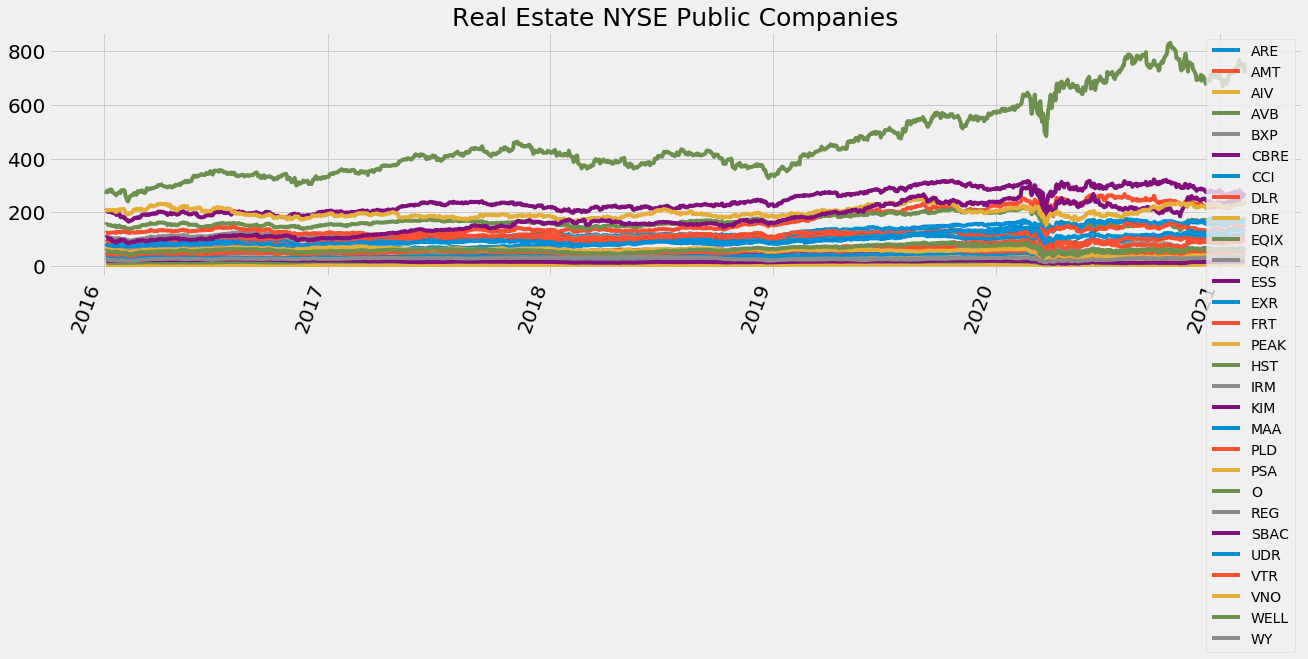

In [93]:
real_state_stocks.plot.line(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="Real Estate NYSE Public Companies", fontsize=25);

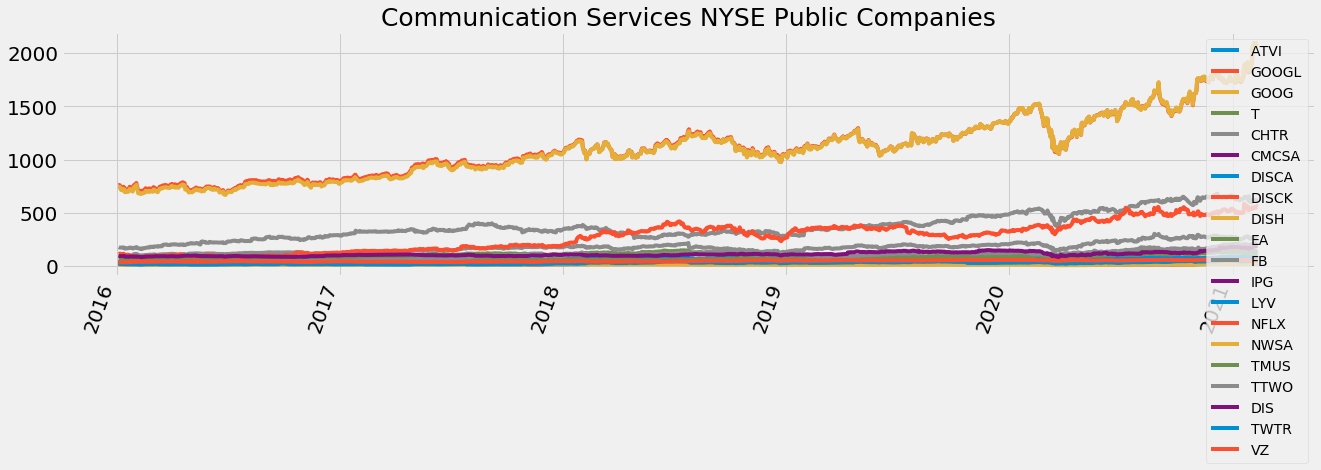

In [94]:
comm_srvc_stocks.plot.line(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="Communication Services NYSE Public Companies", fontsize=25);